Text(0, 0.5, 'Signal Amplitude')

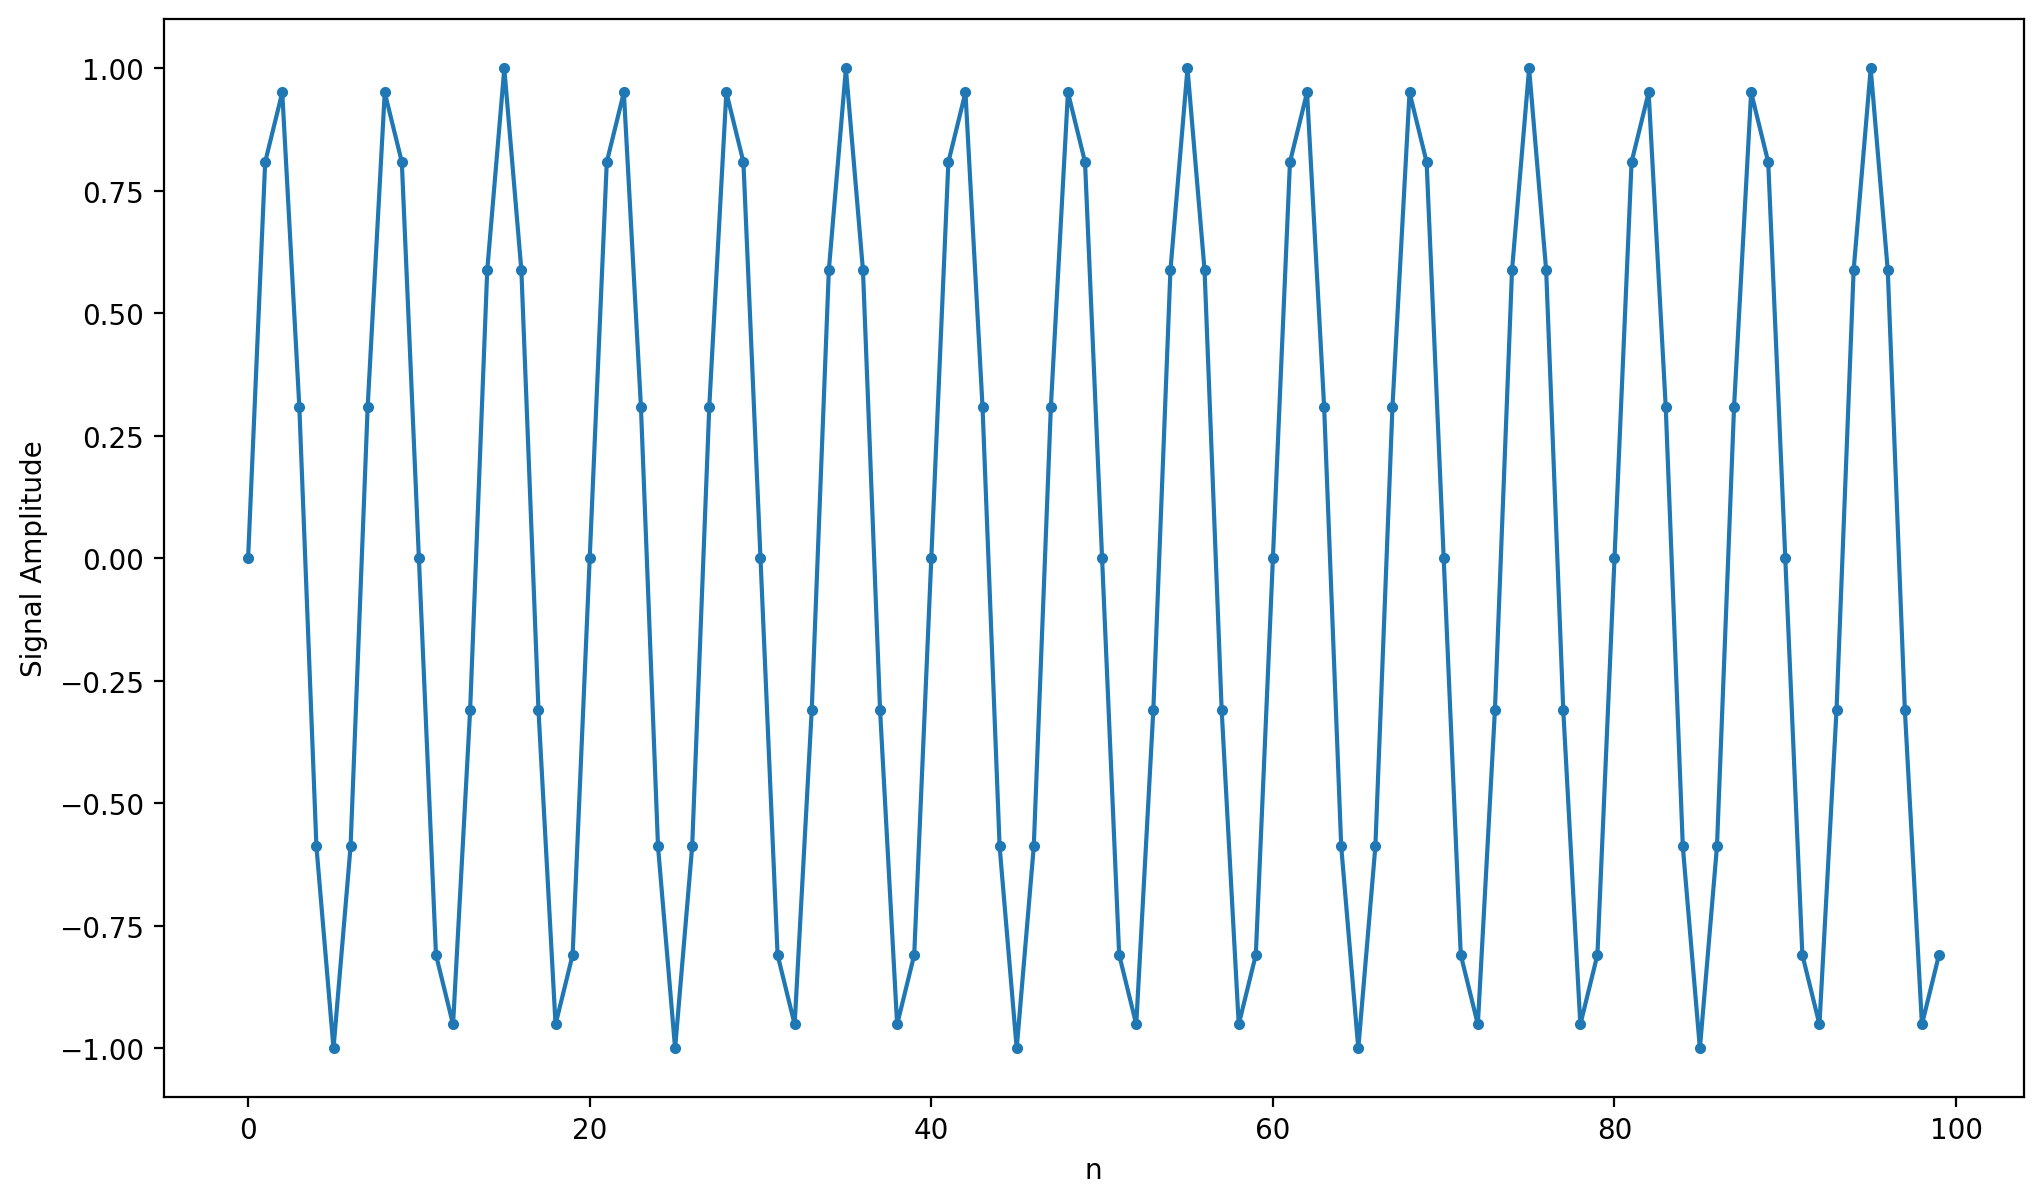

In [7]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(100)
s = np.sin(0.15*2*np.pi*t) # частота 0,15 Гц
plt.plot(t, s, '.-')
plt.xlabel("n")
plt.ylabel("Signal Amplitude")
plt.title("Построение сигнала")

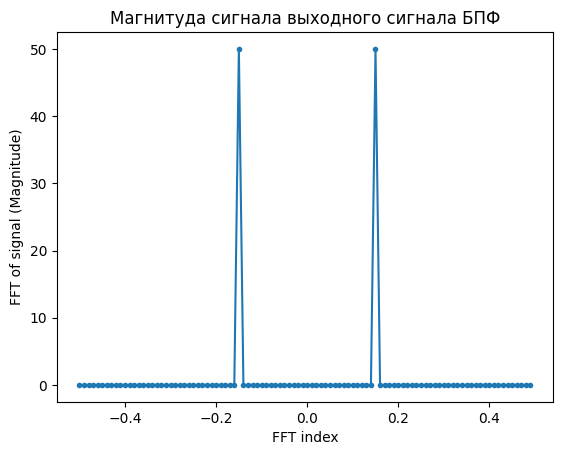

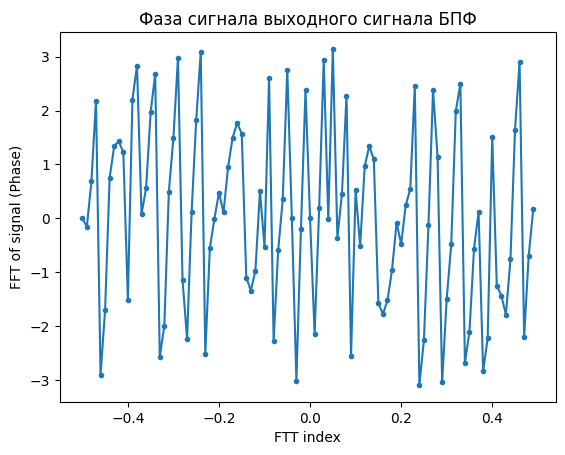

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 1 # Hz
N = 100 # number of points to simulate, and our FFT size

t = np.arange(N) # Создаем массив t, используя функцию arange из библиотеки numpy, который содержит последовательность чисел от 0 до N-1. Этот массив представляет временные отсчеты, так как наша частота дискретизации равна 1 Гц.
s = np.sin(0.15*2*np.pi*t)
S = np.fft.fftshift(np.fft.fft(s)) # Применяем функцию fft из библиотеки numpy к массиву s, чтобы вычислить преобразование Фурье, и применяем функцию fftshift для центрирования результатов.
S_mag = np.abs(S) # амплитуда
S_phase = np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)
plt.figure(0)
plt.plot(f, S_mag,'.-')
plt.title("Магнитуда сигнала выходного сигнала БПФ")
plt.xlabel("FFT index")
plt.ylabel("FFT of signal (Magnitude)")
plt.figure(1)
plt.plot(f, S_phase,'.-')
plt.title("Фаза сигнала выходного сигнала БПФ")
plt.xlabel("FTT index")
plt.ylabel("FFT of signal (Phase)")
plt.show()

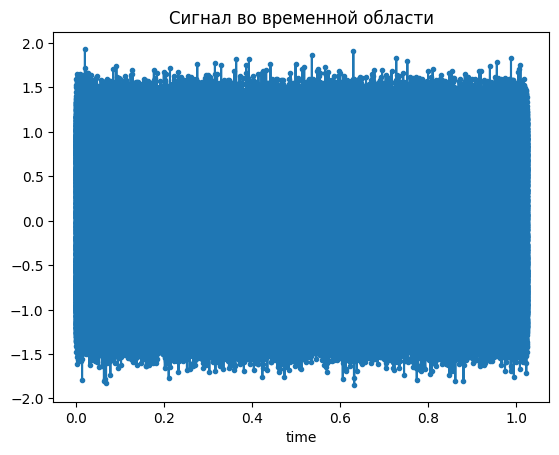

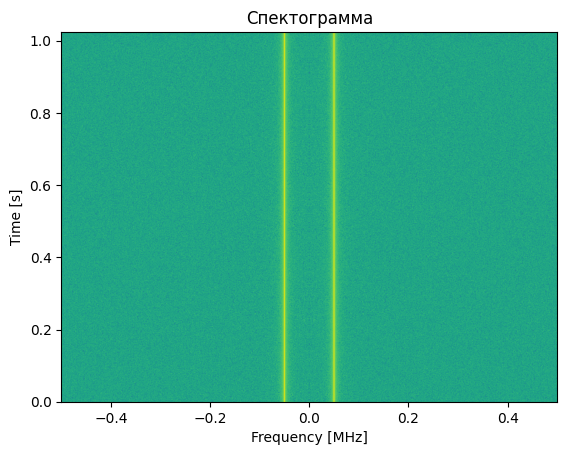

In [5]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 1e6


t = np.arange(1024*1000)/sample_rate # вектор времени
f = 50e3 # freq of tone
x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t)) # сигнал с шумом 
plt.figure(0)
plt.title("Сигнал во временной области")
plt.xlabel("time")
plt.plot(t, x,'.-')


fft_size = 1024
num_rows = len(x) // fft_size # Вычисление количества строк в матрице "спектрограмма" (num_rows) путем деления длины сигнала x на размер БПФ.
spectrogram = np.zeros((num_rows, fft_size))
# В цикле для каждой строки матрицы "спектрограмма" вычисляется БПФ от соответствующего фрагмента сигнала x
for i in range(num_rows):
    spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)

plt.figure(1)
plt.imshow(spectrogram, aspect='auto', extent = [sample_rate/-2/1e6, sample_rate/2/1e6, 0, len(x)/sample_rate])
plt.title("Спектограмма")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()

На спектограмме два тона, потому что был моделирован реальный сигнал, а реальные сигналы всегда имеют отрицательный PSD, соответствующий положительной стороне.

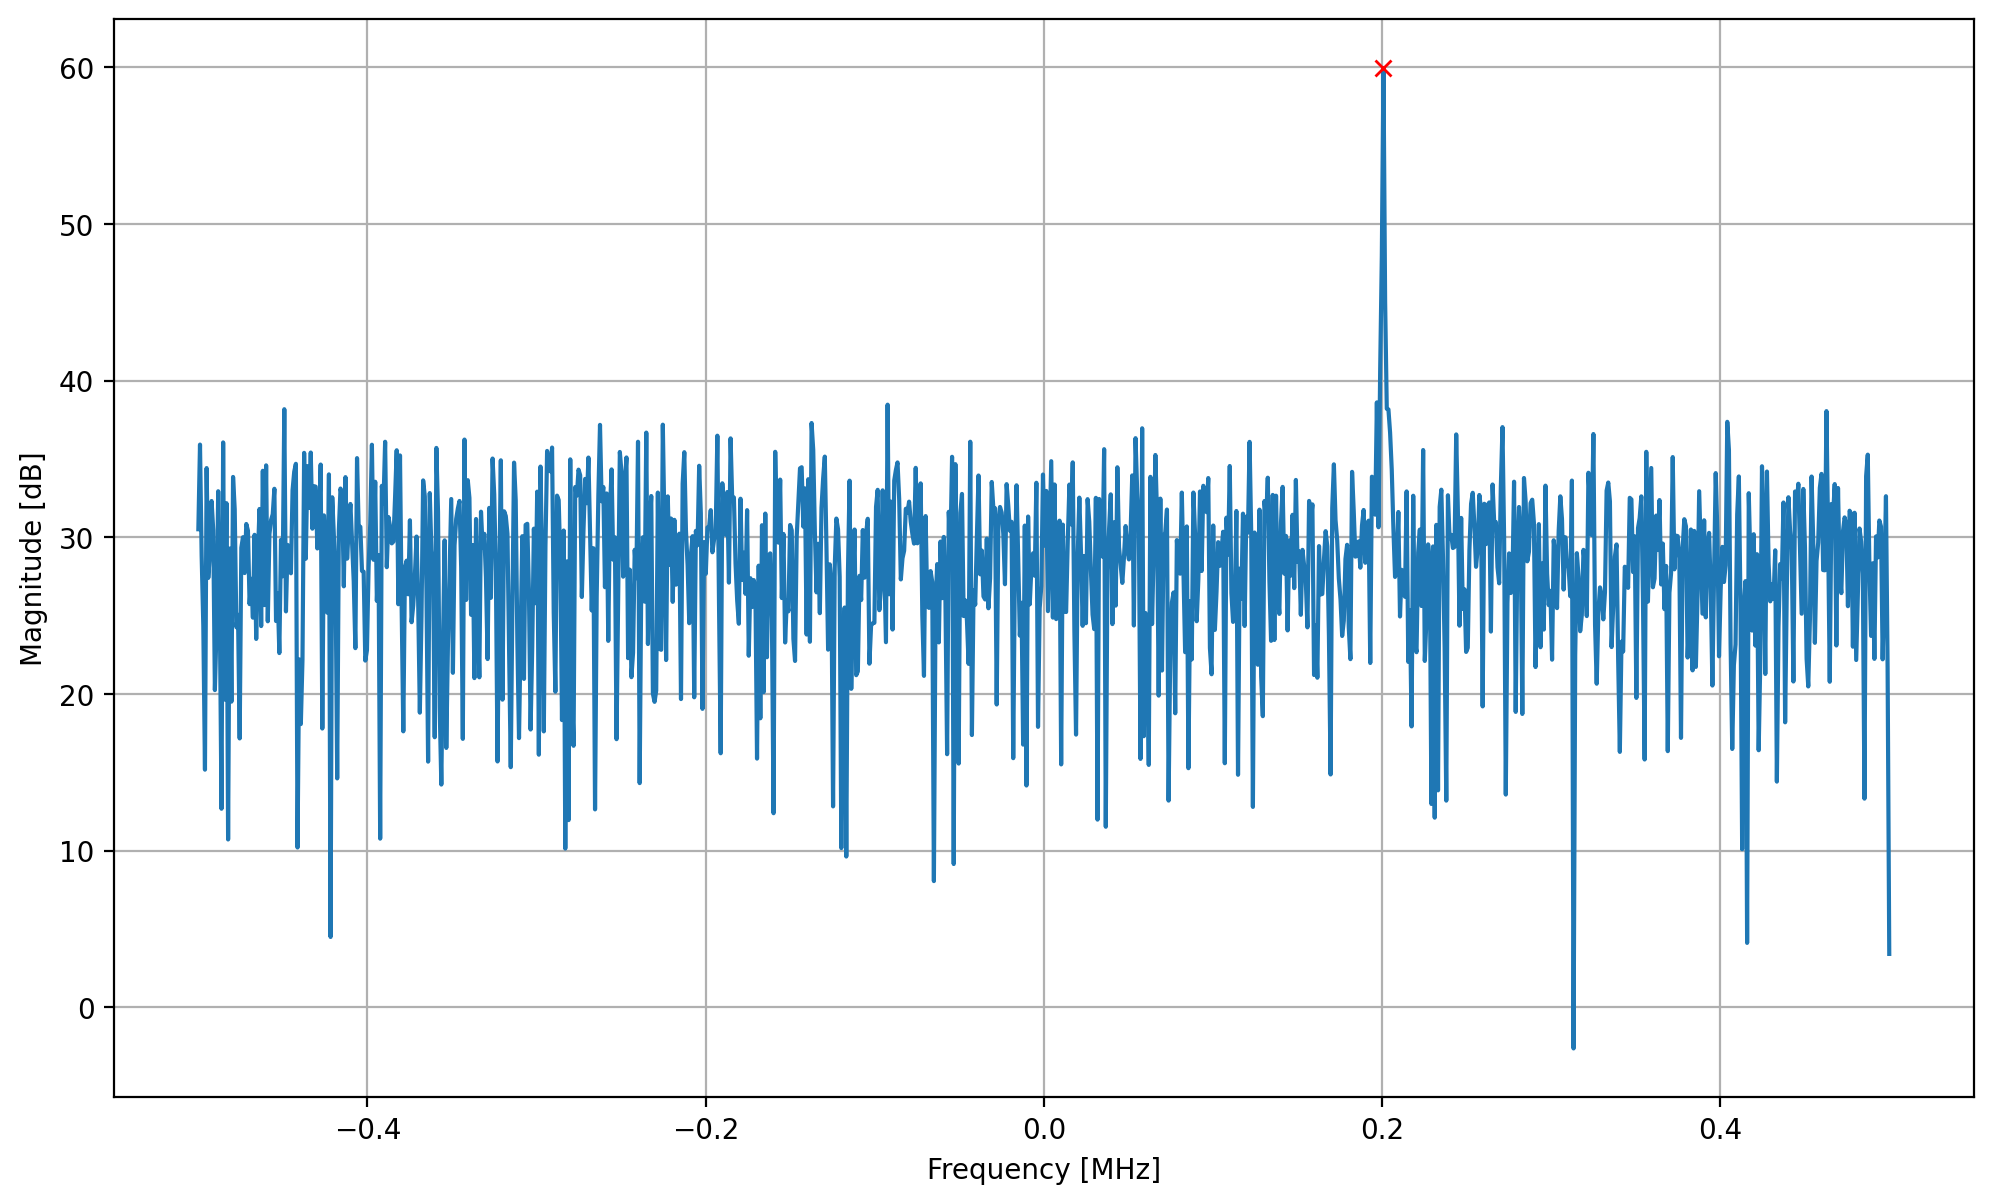

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def fft(x):
    N = len(x)
    if N == 1:
        return x
    twiddle_factors = np.exp(-2j * np.pi * np.arange(N//2) / N)
    x_even = fft(x[::2]) # Рекурсивный вызов функции fft для половины элементов массива x[::2] (четные индексы)
    x_odd = fft(x[1::2]) # нечетные
    return np.concatenate([x_even + twiddle_factors * x_odd,
                           x_even - twiddle_factors * x_odd])

# Simulate a tone + noise
sample_rate = 1e6
f_offset = 0.2e6 # 200 kHz offset from carrier
N = 1024
t = np.arange(N)/sample_rate
s = np.exp(2j*np.pi*f_offset*t)
n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2) #Создание массива n, содержащего комплексный белый шум с помощью функции random.randn и random.randn, деленных на sqrt(2).
r = s + n # 0 dB SNR

# Perform fft, fftshift, convert to dB
X = fft(r) # Применение быстрого преобразования Фурье к массиву r и сохранение результата в переменную X
X_shifted = np.roll(X, N//2) # Сдвиг результатов преобразования Фурье с помощью функции roll на N//2 элементов и сохранение результата в переменную X_shifted.
X_mag = 10*np.log10(np.abs(X_shifted)**2)

# Plot results
f = np.linspace(sample_rate/-2, sample_rate/2, N)/1e6 # plt in MHz
plt.plot(f, X_mag)
plt.plot(f[np.argmax(X_mag)], np.max(X_mag), 'rx') # show max
plt.grid()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Magnitude [dB]')
plt.show() 

На графике представлен результат реализации БПФ на Python, а также пример сигнала, состоящего из тона и шума, для тестирования БПФ